In [35]:
from IPython.core.display import HTML
HTML(r"""
<style>
    .output-plaintext, .output-stream, .output {
        font-family: Lucida Console !important;
        font-size: 13.5px !important;
    }
</style>
""")

In [1]:
pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-a_pq_ffm
  Running command git clone -q https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-a_pq_ffm
     |████████████████████████████████| 134 kB 796 kB/s eta 0:00:01
     |████████████████████████████████| 11.8 MB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 380 kB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 17.1 MB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 384 kB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 6.0 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 296 kB 6.4 MB/s eta 0:00:01
     |████████████████████████████████| 965 kB 5.4 MB/s eta 0:00:01
     |████████████████████████████████| 19.2 MB 218 kB/s eta 0:00:01
     |███████████████████████████████

In [2]:
pip install pylatexenc

     |████████████████████████████████| 162 kB 1.5 MB/s eta 0:00:01
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136822 sha256=6c1fe23f89b6b23f22e32571a8051aec8210b482ca9ae95f12b3c7f031c89b76
  Stored in directory: /home/archi/.cache/pip/wheels/a3/68/66/2f15abd0673d83c02f354115feedeb89c3daed2ac319b11090
Successfully built pylatexenc
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


# Creating a Simple Quantum Circuit

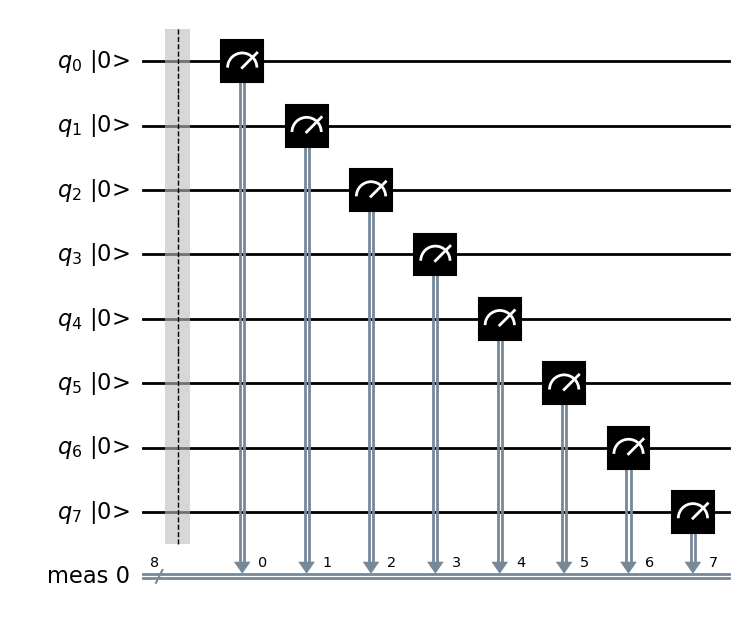

In [1]:
from qiskit import QuantumCircuit

# creating a qunatum circuit with 8 qubits
quantumCircuit= QuantumCircuit(8)

# adds some measurement to each qubit and adds a classical bit where the output will be captured
# the output of each qubit by default is always 0
quantumCircuit.measure_all( )

quantumCircuit.draw(initial_state= True)

# Encoding inputs into Quantum Systems

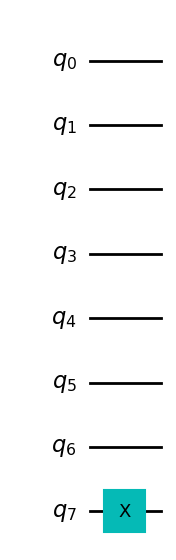

In [14]:
quantumCircuit = QuantumCircuit(8)

#* opertion x acts like a classical NOT gate
#* operation x applied to the last qubit
quantumCircuit.x(7)

quantumCircuit.draw( )

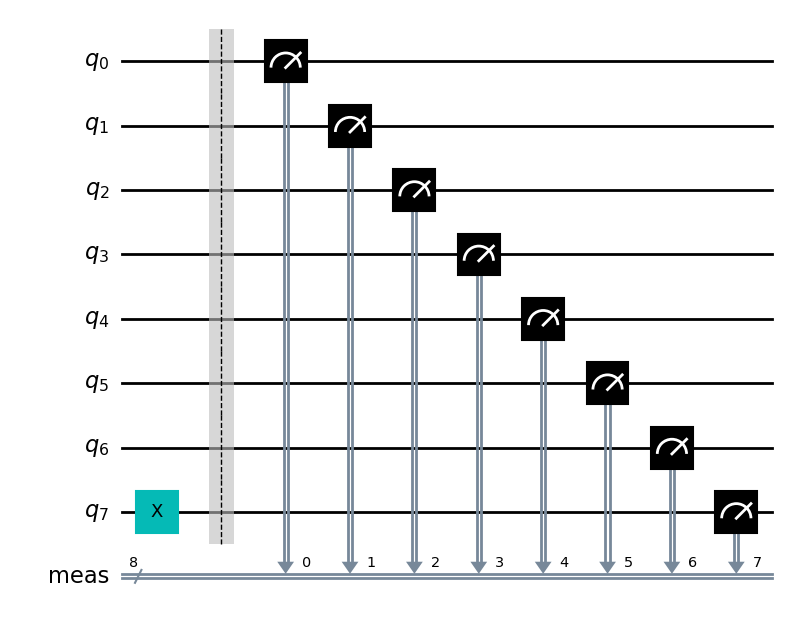

In [15]:
quantumCircuit.measure_all( )

quantumCircuit.draw( )

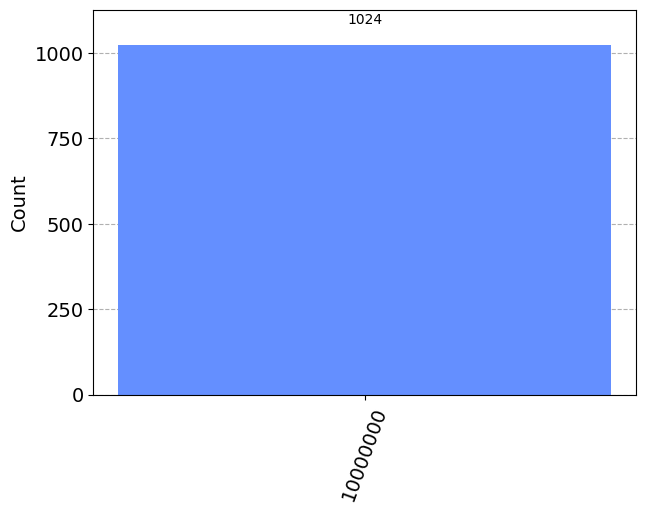

In [16]:
from qiskit import Aer
from qiskit.visualization import plot_histogram

quantumComputerSimulator = Aer.get_backend("aer_simulator")

executionResult = quantumComputerSimulator.run(quantumCircuit).result( )
executionCounts = executionResult.get_counts( )

plot_histogram(executionCounts)

# Creating a Half Adder Circuit

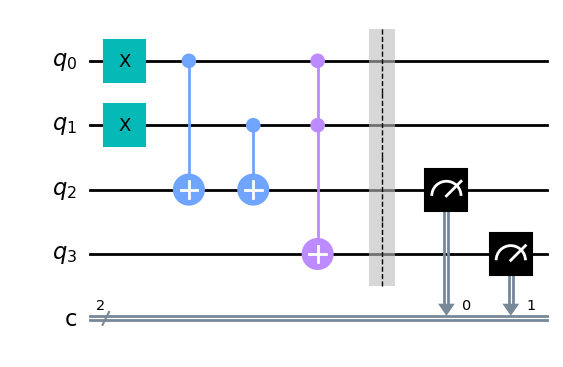

In [19]:
halfAdderCircuit = QuantumCircuit(4, 2)

# encode inputs
halfAdderCircuit.x(0) # include if 1st qubit needs to be 1
halfAdderCircuit.x(1) # include if 2nd qubit needs to be 1

# perform operation

halfAdderCircuit.cx(0, 2)
halfAdderCircuit.cx(1, 2)

halfAdderCircuit.ccx(0, 1, 3)

halfAdderCircuit.barrier( )

# extract the output into 2 classical qubits
halfAdderCircuit.measure(2, 0)
halfAdderCircuit.measure(3, 1)

halfAdderCircuit.draw( )

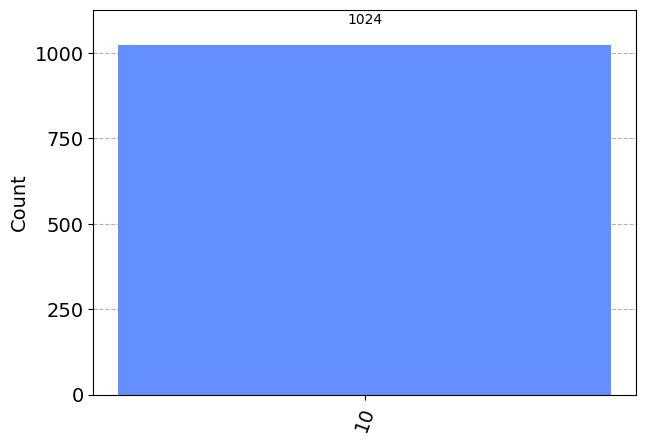

In [20]:
from qiskit import assemble

qObj = assemble(halfAdderCircuit)
executionCounts = quantumComputerSimulator.run(qObj).result( ).get_counts( )

plot_histogram(executionCounts)

# Exploring Qubits in Qiskit

We use the **QuantumCircuit** object to store information about the qubits and operations we will be using in our quantum circuit.

In [16]:
from qiskit import QuantumCircuit

quantumCircuit = QuantumCircuit(
  # number of qubits we want in this quantum circuit
  1
)

In our quantum circuit, the qubits always initialize in the state |0>. We can change the initial state of the qubit using the **initialize( )** method.

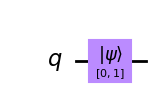

In [17]:
# initialize qubit q0 in state (0|0> + 1|1>)
quantumCircuit.initialize([0, 1], 0)

quantumCircuit.draw( )

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


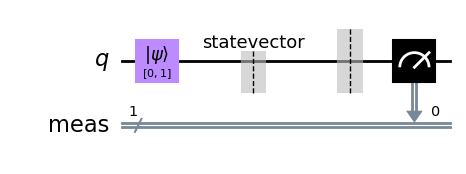

In [18]:
quantumCircuit.save_statevector( )

from qiskit import Aer, assemble

quantumComputerSimulator = Aer.get_backend("aer_simulator")

executionResult = quantumComputerSimulator.run(assemble(quantumCircuit)).result( )
print(executionResult.get_statevector( ))

# measure qubits as we would in a real quantum computor
quantumCircuit.measure_all( )
quantumCircuit.draw( )

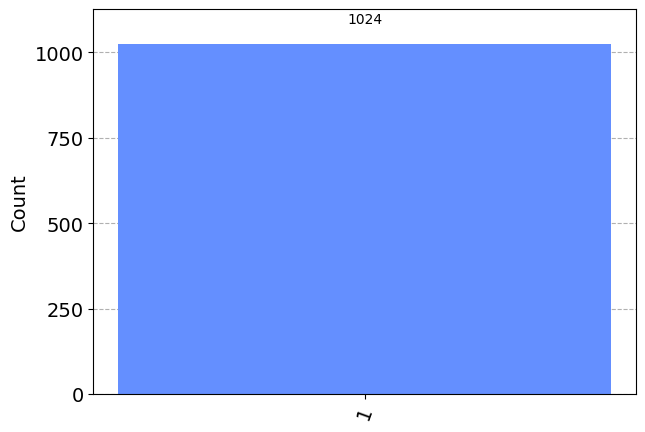

In [20]:
# running the above process multiple times

from qiskit.visualization import plot_histogram

executionResult = quantumComputerSimulator.run(assemble(quantumCircuit)).result( )
executionCounts = executionResult.get_counts( )

plot_histogram(executionCounts)

Now let's try the same process again, but this time we will initialize the qubit in a state

$$
|q_0> = \frac{1}{\sqrt2}|0> + \frac{i}{\sqrt2}|1>
$$

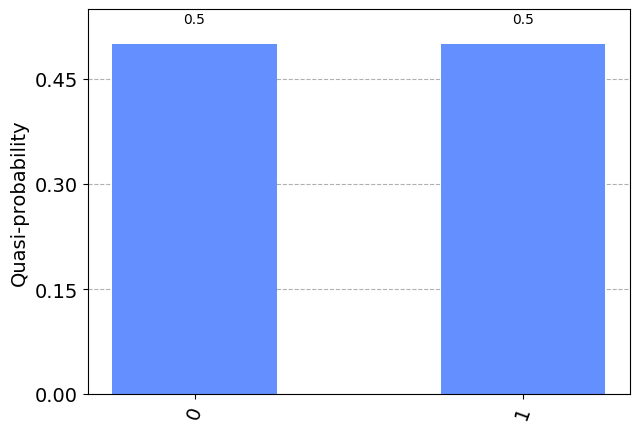

In [21]:
from math import sqrt

quantumCircuit = QuantumCircuit(1)

quantumCircuit.initialize([1/sqrt(2), 1j/sqrt(2)], 0)
quantumCircuit.save_statevector( )

executionResult = quantumComputerSimulator.run(assemble(quantumCircuit)).result( )
executionCounts = executionResult.get_counts( )

plot_histogram(executionCounts)

This time, we see we have equal probability of measuring 0 or 1 for the qubit.

# Collapsing of Qubits

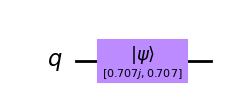

In [22]:
quantumCircuit = QuantumCircuit(1)
quantumCircuit.initialize([0.+1.j/sqrt(2),1/sqrt(2)+0.j], 0)

quantumCircuit.draw( )

In [23]:
quantumCircuit.save_statevector( )

simulationResult = quantumComputerSimulator(assemble(quantumCircuit)).result( )
print("qubit state - ", str(simulationResult.get_statevector( )))

TypeError: 'AerSimulator' object is not callable